In [2]:
import numpy as np
import pandas as pd+
import matplotlib.pyplot as plt
data=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

FileNotFoundError: [Errno 2] No such file or directory: '311_Service_Requests_from_2010_to_Present.csv'

In [247]:

data.describe()


,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [248]:
data.columns


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [249]:
data.shape


(364558, 53)

In [279]:
data.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                   0
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

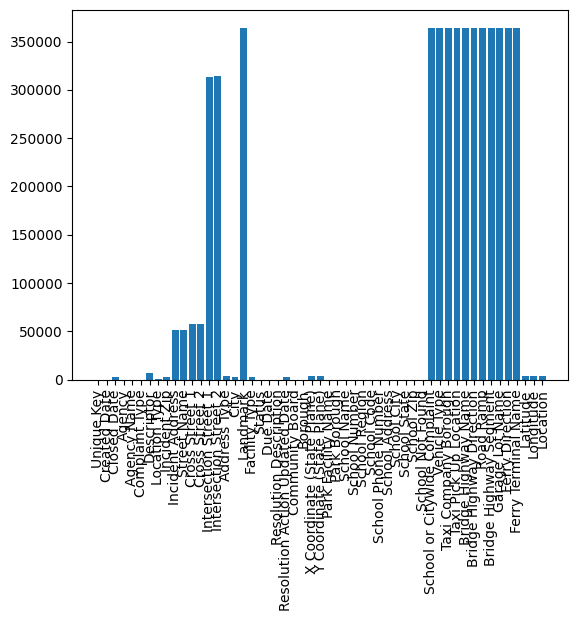

In [251]:
x=np.ndarray(53)
a=0
for i in data.columns:
    x[a]=data[i].isna().sum()
    a=a+1
plt.bar(data.columns,x)
plt.xticks(rotation=90)
plt.show()

In [292]:
data.dropna(subset=['Closed Date'],inplace=True)
data["Closed Date"].isna().sum()

0

In [253]:

data['dateCreated']=pd.to_datetime(data["Created Date"])
data['dateClosed']=pd.to_datetime(data["Closed Date"])
data['elapsed']=(data["dateClosed"]-data["dateCreated"]).dt.total_seconds()
data

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,dateCreated,dateClosed,elapsed
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",2015-12-31 23:59:45,2016-01-01 00:55:15,3330.0
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",2015-12-31 23:59:44,2016-01-01 01:26:57,5233.0
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",2015-12-31 23:59:29,2016-01-01 04:51:03,17494.0
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",2015-12-31 23:57:46,2016-01-01 07:43:13,27927.0
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",2015-12-31 23:56:58,2016-01-01 03:24:42,12464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",2015-01-01 00:04:44,2015-01-01 10:22:31,37067.0
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",2015-01-01 00:04:28,2015-01-01 02:25:02,8434.0
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)",2015-01-01 00:01:30,2015-01-01 00:20:33,1143.0
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)",2015-01-01 00:01:29,2015-01-01 02:42:22,9653.0


In [254]:
data['elapsed'].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: elapsed, dtype: float64

In [255]:
data[["City","Complaint Type"]].isna().sum()

City              2997
Complaint Type       0
dtype: int64

In [256]:
## 2.3
from sklearn.impute import SimpleImputer
imp_values=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value='Unknown City')
imp_values.fit(data[["City","Unique Key"]])
SimpleImputer(strategy='constant',fill_value='Unknown City')
data["City"]=imp_values.transform(data[["City","Unique Key"]])
data[["City","Complaint Type"]].isna().sum()

City              0
Complaint Type    0
dtype: int64

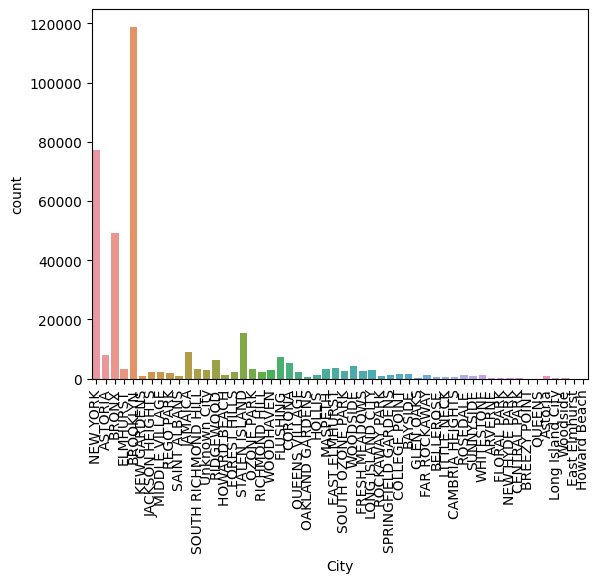

In [257]:
import seaborn as sns
sns.countplot(x='City',data=data)
plt.xticks(rotation=90)
plt.show()


<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

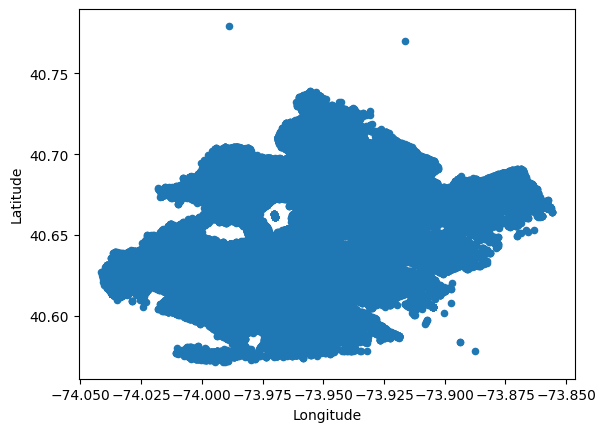

In [258]:
data.groupby("City").get_group("BROOKLYN")[["Longitude","Latitude"]].plot(kind="scatter",x='Longitude',y='Latitude')


<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

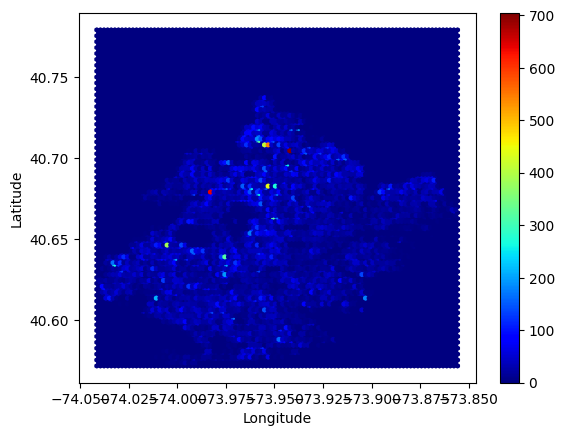

In [259]:
data.groupby("City").get_group("BROOKLYN")[["Longitude","Latitude"]].plot(kind="hexbin",x='Longitude',y='Latitude',colormap='jet')


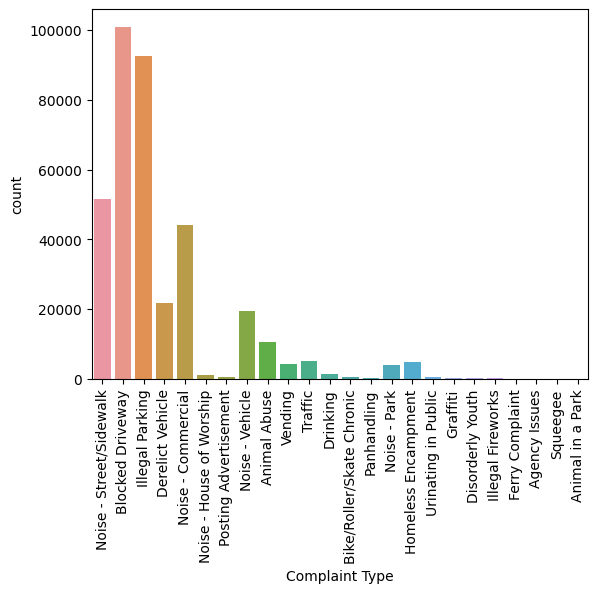

In [260]:
import seaborn as sns
sns.countplot(x='Complaint Type',data=data)
plt.xticks(rotation=90)
plt.show()

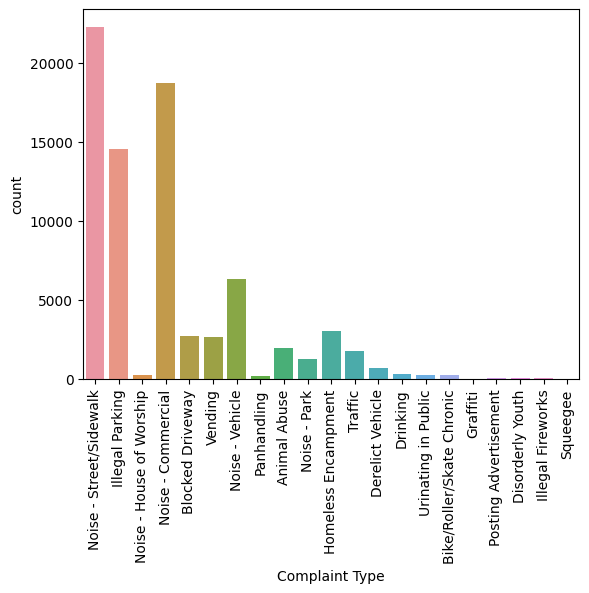

In [261]:
sns.countplot(x='Complaint Type',data=data.groupby('City').get_group('NEW YORK'))
plt.xticks(rotation=90)
plt.show()

In [262]:
data.groupby("City").get_group('NEW YORK')["Complaint Type"].value_counts().head(10)

Noise - Street/Sidewalk    22252
Noise - Commercial         18692
Illegal Parking            14553
Noise - Vehicle             6295
Homeless Encampment         3060
Blocked Driveway            2707
Vending                     2639
Animal Abuse                1941
Traffic                     1770
Noise - Park                1244
Name: Complaint Type, dtype: int64

In [294]:
data.groupby('City')["Complaint Type"].value_counts()

City      Complaint Type         
ARVERNE   Illegal Parking             62
          Blocked Driveway            50
          Animal Abuse                46
          Derelict Vehicle            32
          Noise - Street/Sidewalk     29
                                    ... 
Woodside  Illegal Parking            124
          Blocked Driveway            27
          Derelict Vehicle             8
          Noise - Street/Sidewalk      5
          Noise - Commercial           2
Name: Complaint Type, Length: 792, dtype: int64

In [264]:
df_new=data.pivot_table(columns=data["City"], index=data["Complaint Type"],values= 'Unique Key',aggfunc='count')
df_new

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
Animal Abuse,46.0,170.0,NaN,53.0,15.0,2.0,1971.0,3191.0,15.0,NaN,...,74.0,40.0,42.0,786.0,40.0,12.0,43.0,57.0,111.0,NaN
Animal in a Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bike/Roller/Skate Chronic,NaN,16.0,NaN,NaN,1.0,NaN,22.0,124.0,NaN,NaN,...,1.0,1.0,NaN,10.0,2.0,5.0,4.0,2.0,5.0,NaN
Blocked Driveway,50.0,3436.0,159.0,514.0,138.0,3.0,17063.0,36447.0,177.0,NaN,...,1202.0,1946.0,330.0,2845.0,278.0,333.0,279.0,1364.0,2038.0,27.0
Derelict Vehicle,32.0,426.0,14.0,231.0,120.0,3.0,2403.0,6259.0,148.0,NaN,...,425.0,356.0,267.0,2184.0,17.0,201.0,279.0,369.0,298.0,8.0
Disorderly Youth,2.0,5.0,NaN,2.0,2.0,NaN,66.0,79.0,NaN,NaN,...,2.0,2.0,NaN,25.0,2.0,NaN,1.0,NaN,1.0,NaN
Drinking,1.0,43.0,NaN,1.0,1.0,1.0,206.0,291.0,NaN,NaN,...,14.0,25.0,6.0,188.0,12.0,8.0,3.0,4.0,15.0,NaN
Ferry Complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='City'>

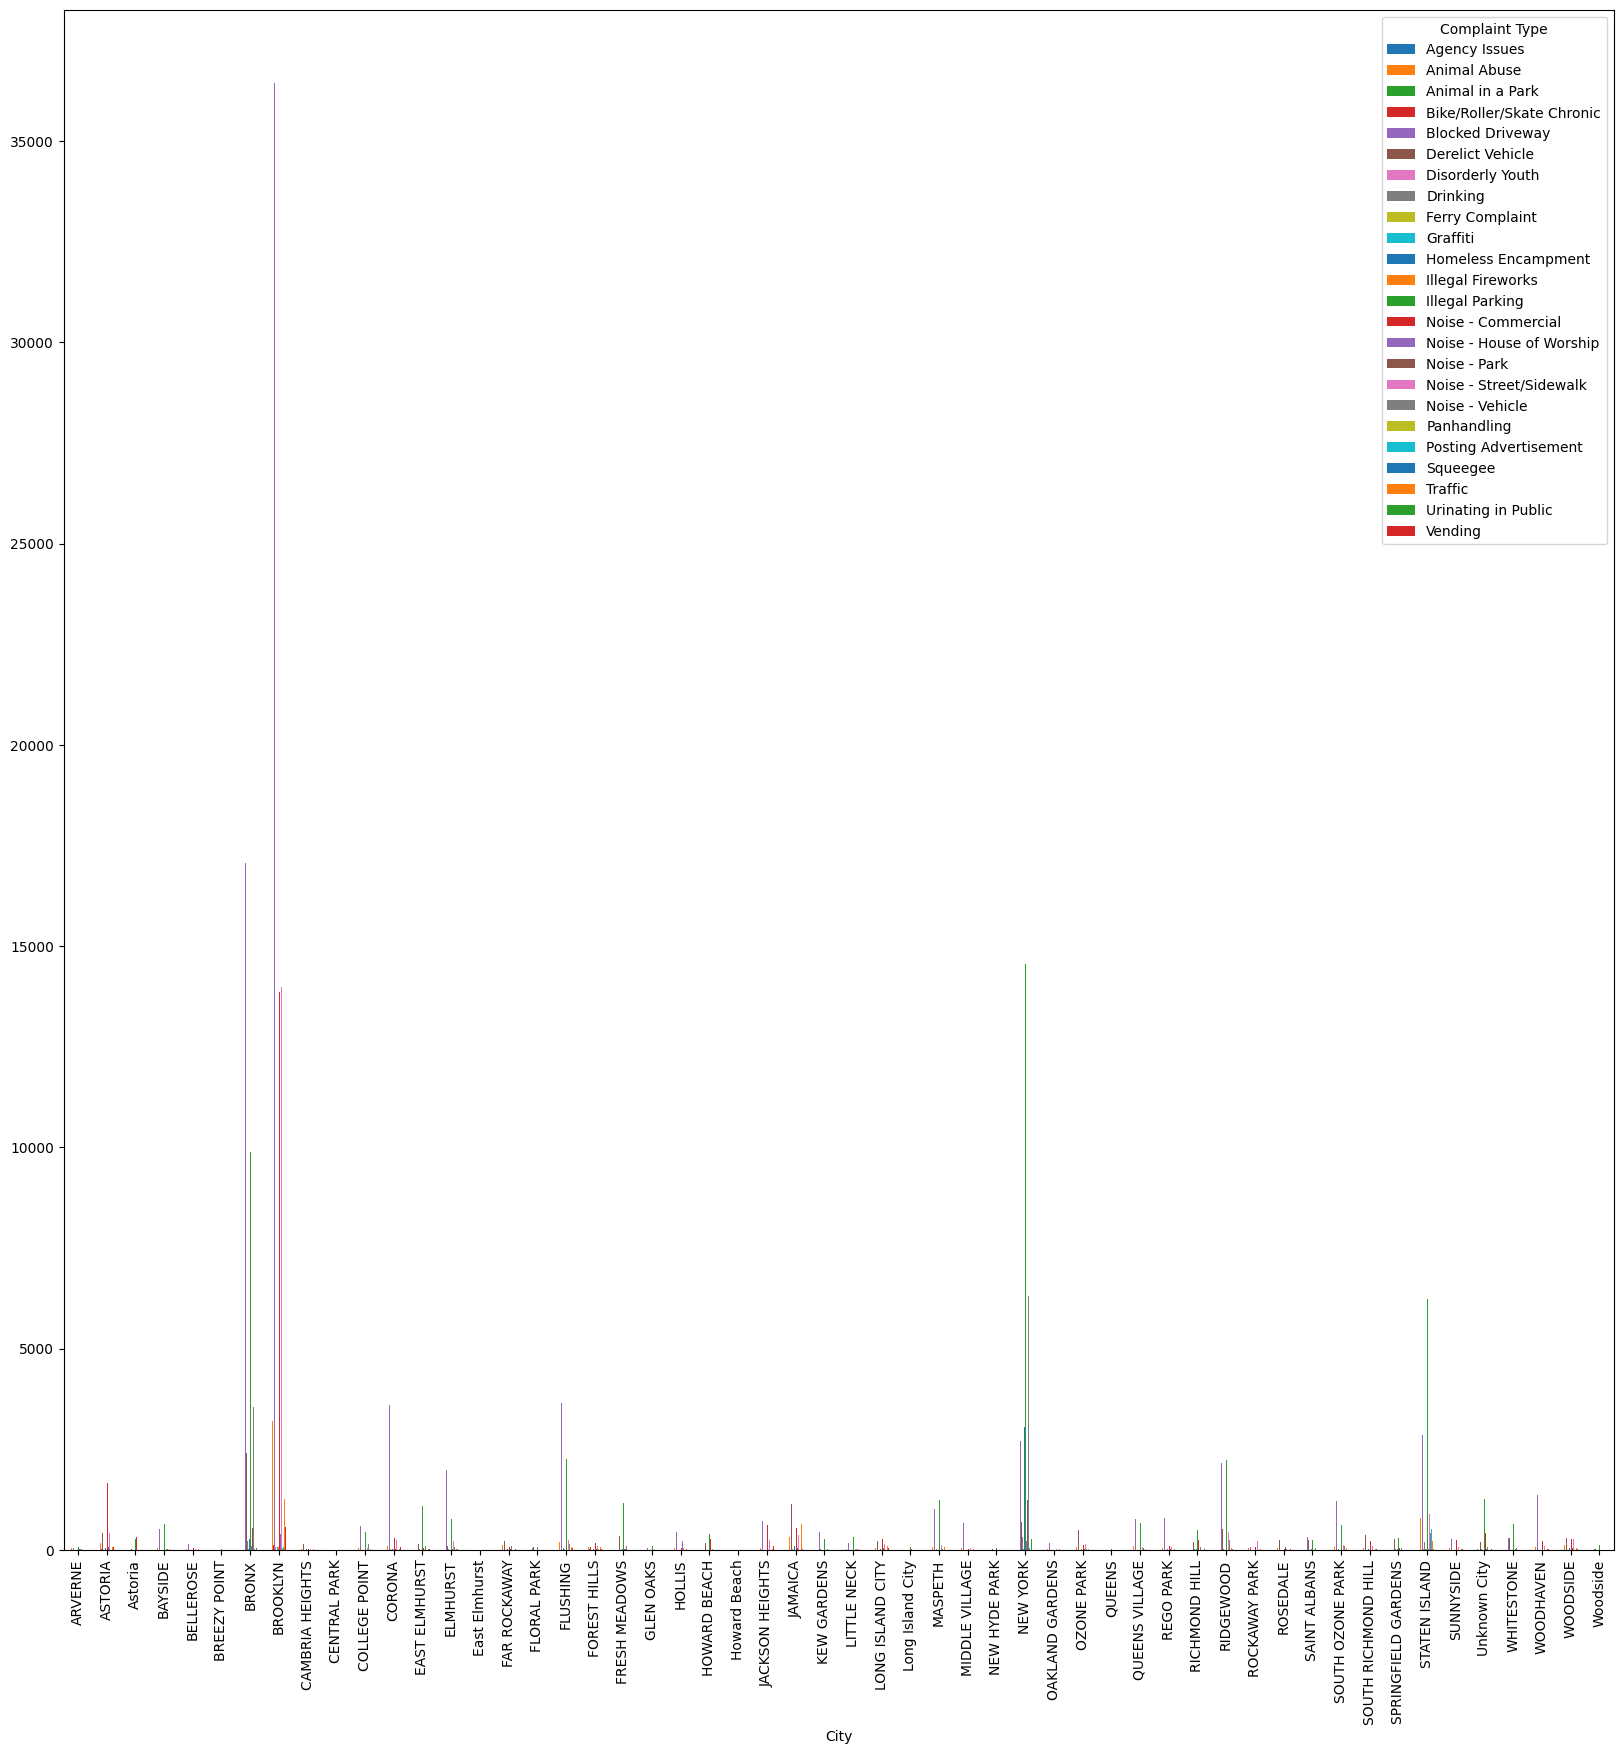

In [265]:
d=df_new.transpose()
d.plot(kind='bar',figsize=(20,20))

In [267]:
df=data[['City','Complaint Type','elapsed']]
df

,City,Complaint Type,elapsed
0,NEW YORK,Noise - Street/Sidewalk,3330.0
1,ASTORIA,Blocked Driveway,5233.0
2,BRONX,Blocked Driveway,17494.0
3,BRONX,Illegal Parking,27927.0
4,ELMHURST,Illegal Parking,12464.0
...,...,...,...
364553,WOODHAVEN,Illegal Parking,37067.0
364554,BRONX,Noise - Vehicle,8434.0
364555,NEW YORK,Noise - Street/Sidewalk,1143.0
364556,BRONX,Blocked Driveway,9653.0


In [268]:
df.groupby(["City","Complaint Type"])['elapsed'].mean()

City      Complaint Type         
ARVERNE   Animal Abuse                8399.195652
          Blocked Driveway            8318.840000
          Derelict Vehicle           11394.000000
          Disorderly Youth           12928.500000
          Drinking                     859.000000
                                         ...     
Woodside  Blocked Driveway           15566.185185
          Derelict Vehicle           19994.500000
          Illegal Parking            17293.459677
          Noise - Commercial          8619.000000
          Noise - Street/Sidewalk    12285.600000
Name: elapsed, Length: 795, dtype: float64

<AxesSubplot: xlabel='City,Complaint Type'>

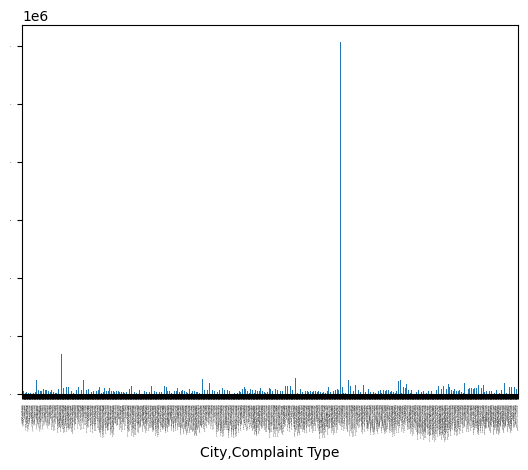

In [278]:
df.groupby(["City","Complaint Type"])['elapsed'].mean().plot(kind='bar',fontsize='0.1')

<AxesSubplot: xlabel='Complaint Type'>

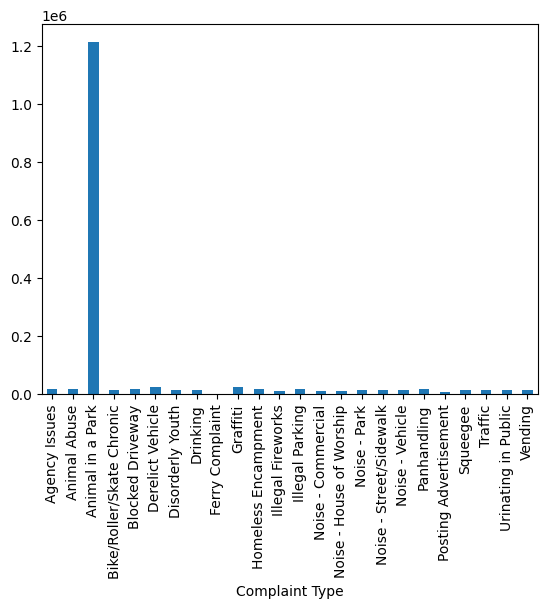

In [275]:
df.groupby(["Complaint Type"])['elapsed'].mean().plot(kind='bar')

In [296]:
from scipy.stats import kruskal

import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

d = data[['elapsed','Complaint Type']]
groups = pd.unique(d['Complaint Type'])
d1 = {grp:d['elapsed'][d['Complaint Type'] == grp]  for grp in groups}
stat, p_value = kruskal(*d1)
stat,p_value

(22.0, 0.45988870269368676)

In [274]:
alpha = 0.05
if p_value < alpha:
    print('Reject Null Hypothesis (Different distribution)')
else:
    print('Do not Reject Null Hypothesis (Same distribution)')

Do not Reject Null Hypothesis (Same distribution)
